# Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os as os
import pandas as pd
import seaborn as sns

import random
random.seed(0) # pick your seed

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from pickle import dump, load

# Data

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)
  dir = os.path.join('gdrive', 'My Drive', 'Eurostat', '02 - Data Science for Structured Data')
else:
  dir = "."
data_dir = os.path.join(dir, 'data')
model_dir = os.path.join(dir, 'model')

Mounted at /content/gdrive


In [ ]:
df_iris = pd.read_csv(os.path.join(data_dir, 'iris.csv'),
                      header=None,
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
df_iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,class
62,6.0,2.2,4.0,1.0,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica
20,5.4,3.4,1.7,0.2,Iris-setosa


In [ ]:
df_pima = pd.read_csv(os.path.join(data_dir, 'pima.csv'),
                      header=8,
                      names = ['preg', 'gluc', 'pres', 'skin' ,'insu', 'bmi', 'pedi', 'age', 'class'])
df_pima.sample(3)

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
517,7,125,86,0,0,37.6,0.304,51,0
323,13,152,90,33,29,26.8,0.731,43,1
632,2,111,60,0,0,26.2,0.343,23,0


In [ ]:
df_wine = pd.read_csv(os.path.join(data_dir, 'wine.csv'), 
                      sep=';')
df_wine.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
161,7.6,0.68,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2,4
339,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
946,10.2,0.44,0.58,4.1,0.092,11.0,24.0,0.99745,3.29,0.99,12.0,7


In [ ]:
df_housing = pd.read_csv(os.path.join(data_dir, 'housing.csv'))
df_housing.sample(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
164,2.24236,0.0,19.58,0,0.605,5.854,91.8,2.4220,5,403,14.7,395.11,11.64,22.7
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9


In [ ]:
df_happiness = pd.read_csv(os.path.join(data_dir, 'happiness.csv'))
df_happiness.sample(3)

,isced11,sex,age,geo,time,ACCSAT,COMSAT,FINSAT,GREENSAT,JOBSAT,LIFESAT,LIVENVSAT,MEANLIFE,RELSAT,TIMESAT
1026,ED3_4,F,Y65-74,ME,2013,6.8,NaN,4.7,6.3,NaN,5.3,5.9,5.7,6.5,6.9
1499,ED5-8,F,Y25-34,IE,2018,NaN,NaN,7.2,NaN,7.8,8.3,NaN,NaN,8.8,7.0
1343,ED3_4,M,Y65-74,BE,2018,NaN,NaN,7.4,NaN,NaN,7.8,NaN,NaN,8.1,7.9


# Regression Metrics

## Mean Absolute Error

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

X = df_wine.copy()
y = X.pop('quality')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = LinearRegression()

scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"MAE: {-results.mean():.4f} ({results.std():.4f})")

MAE: 0.5044 (0.0196)


## Mean Squared Error

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

X = df_wine.copy()
y = X.pop('quality')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = LinearRegression()

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"MSE: {-results.mean():.4f} ({results.std():.4f})")

MSE: 0.4246 (0.0375)


In [ ]:
%%html
<iframe src="https://scikit-learn.org/stable/modules/model_evaluation.html" width="1100" height="600"></iframe>

# Spot-Check Regression Algorithms
- Establish short-list of algorithms that work well on your problem
- Later: Tune those algorithms

In [ ]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


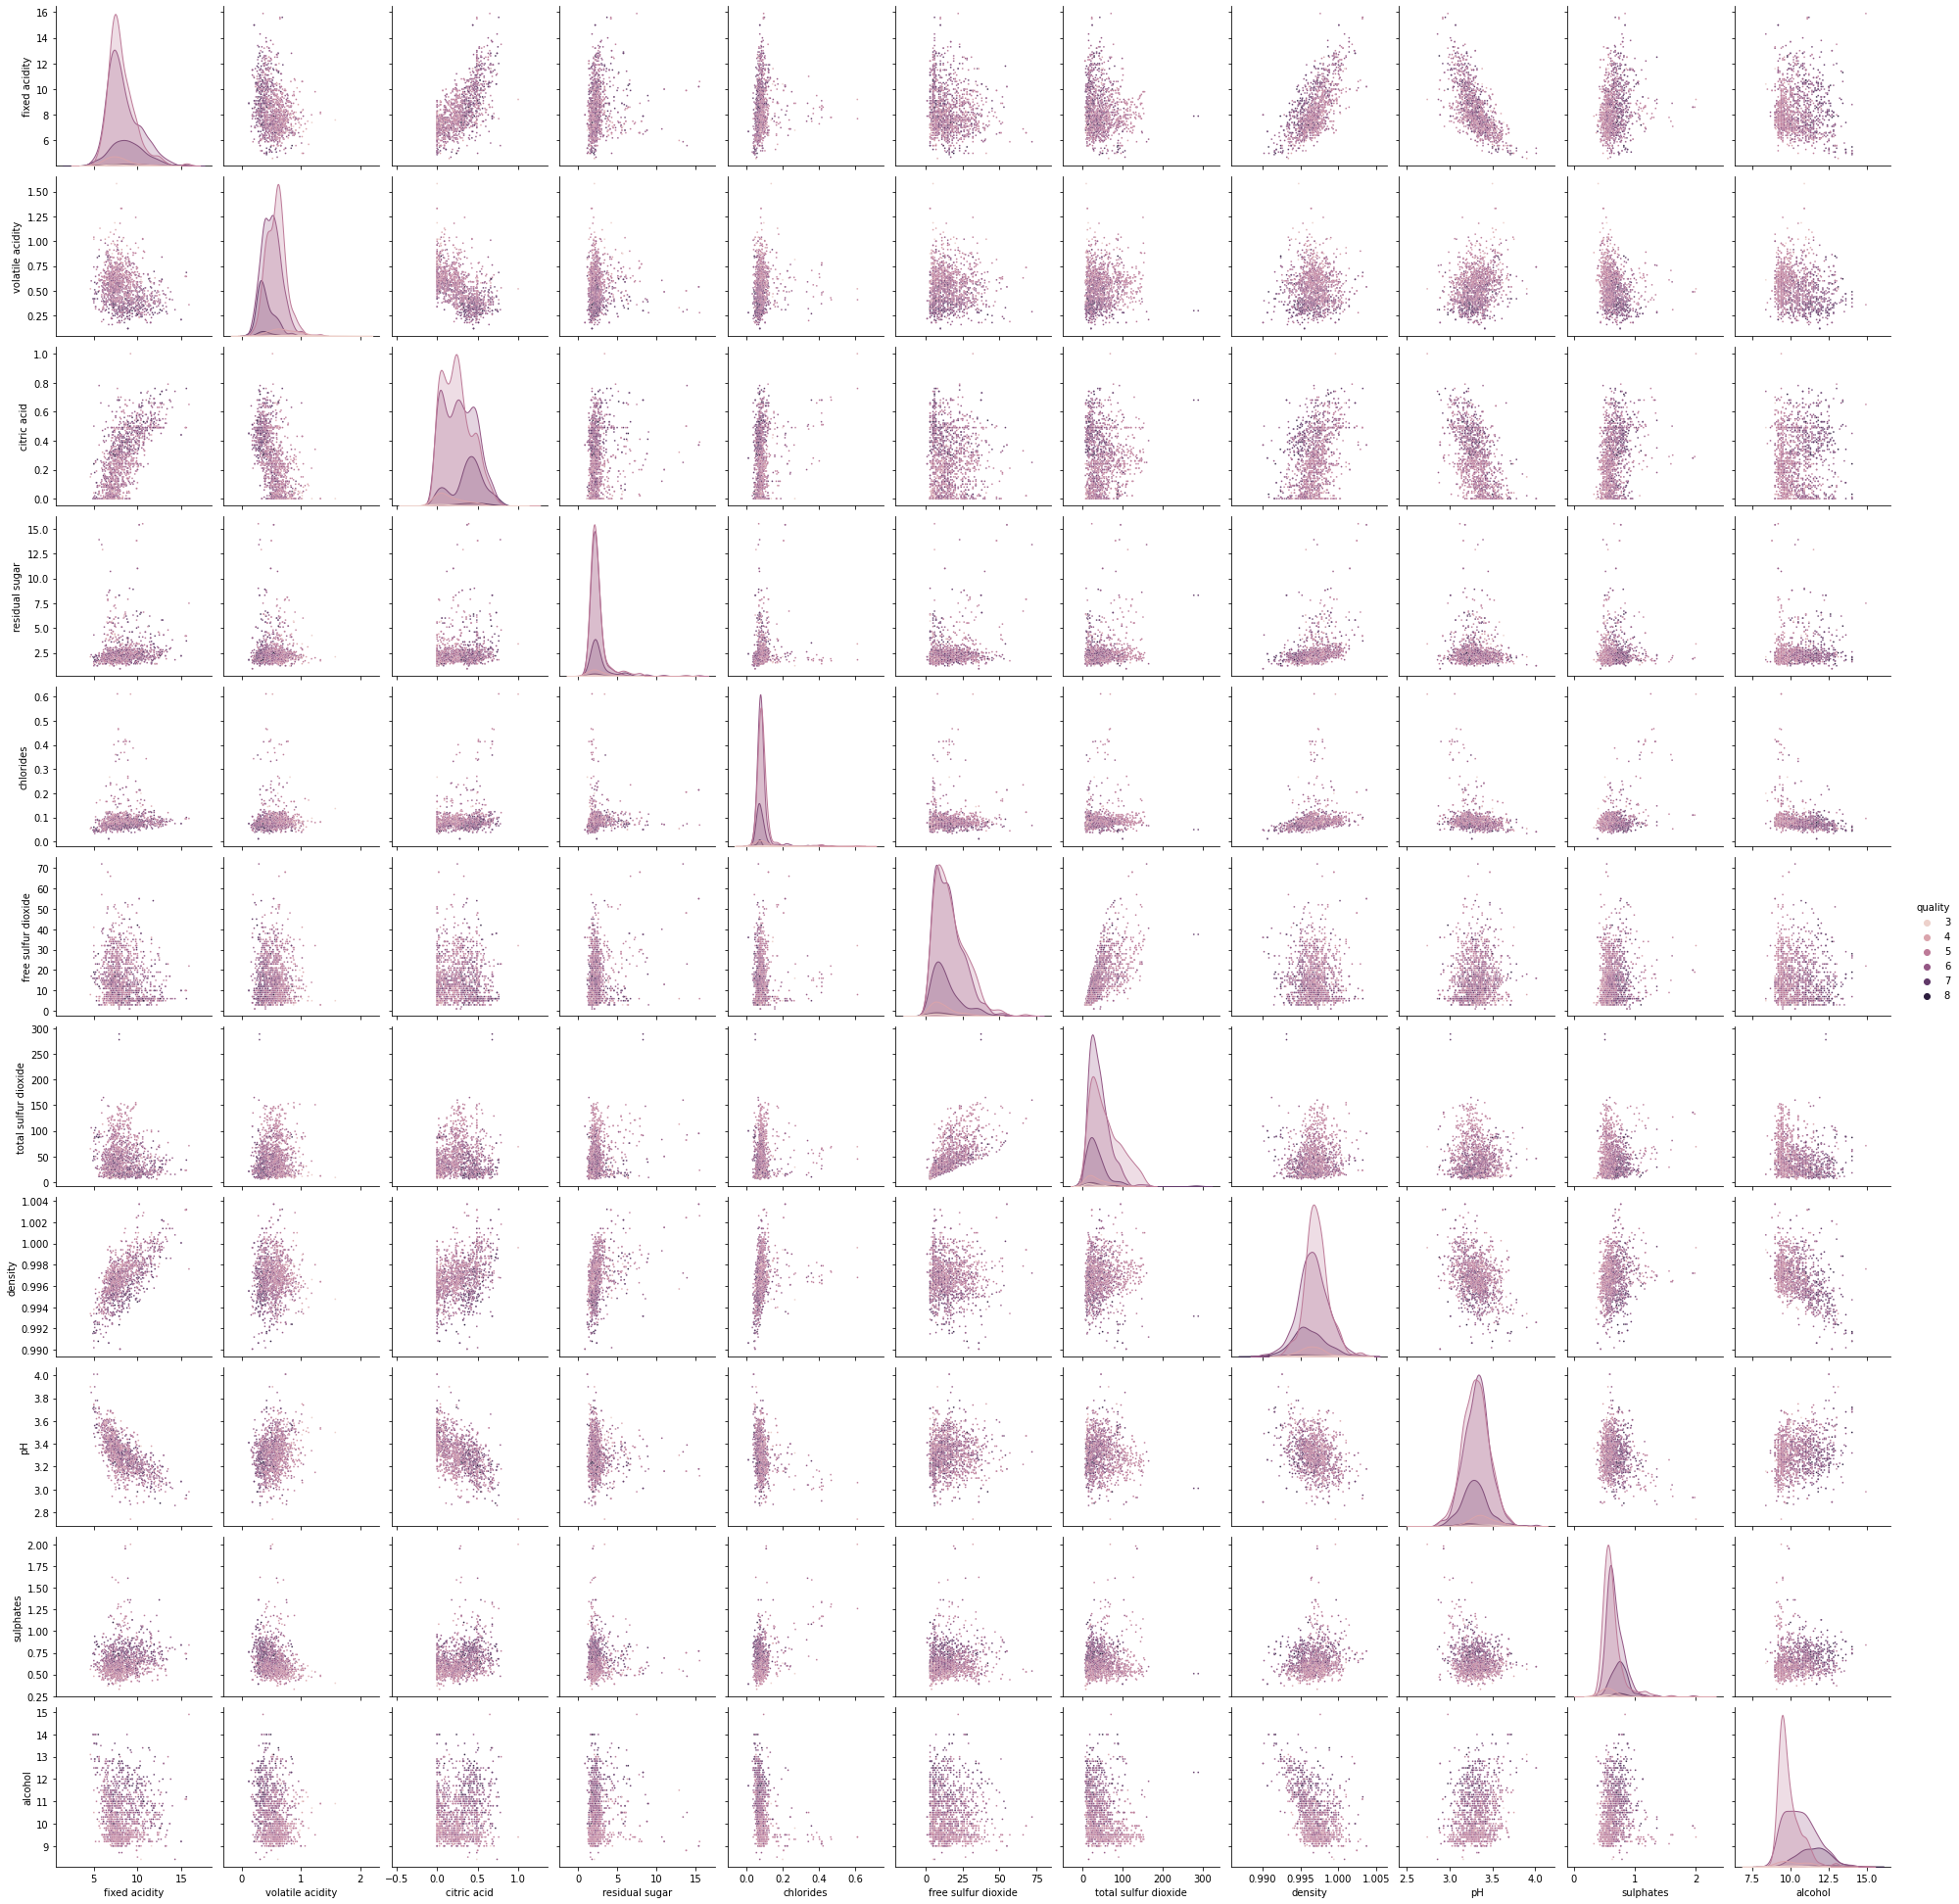

In [ ]:
sns.pairplot(data=df_wine,
             hue='quality',
             plot_kws={"s": 3})

## Linear Regression Algorithms

### Linear Regression
- Assumes that the input variables have a Gaussian distribution. 
- It is also assumed that input variables are relevant to the output variable and that they are not highly correlated with each other (a problem called collinearity).
- [Understand it](https://en.wikipedia.org/wiki/Linear_regression)
- [Use it](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

X = df_wine.copy()
y = X.pop('quality')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = LinearRegression()

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"MSE: {-results.mean():.4f} ({results.std():.4f})")

MSE: 0.4246 (0.0375)


### Ridge Regression
- is an extension of linear regression where the loss function is modified to minimize the complexity of the model, measured as the **L2-norm** of the coefficients.

- [Understand it](https://en.wikipedia.org/wiki/Ridge_regression)
- [Use it](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge

X = df_wine.copy()
y = X.pop('quality')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = Ridge(alpha=0.1)

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"MSE: {-results.mean():.4f} ({results.std():.4f})")

MSE: 0.4242 (0.0377)


### LASSO Regression
- The **Least Absolute Shrinkage and Selection Operator** (LASSO) is a modification of linear regression, where the loss function is modified to minimize the complexity of the model, measured as the **L1-norm** of the coefficients.

- [Understand it](https://en.wikipedia.org/wiki/Lasso_(statistics))
- [Use it](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Lasso

X = df_wine.copy()
y = X.pop('quality')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = Lasso(alpha=1)

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"MSE: {-results.mean():.4f} ({results.std():.4f})")

MSE: 0.6326 (0.0529)


### ElasticNet Regression
- a form of regularization regression that combines the properties of both **Ridge Regression** and **LASSO** regression.
- seeks to minimize the complexity of the regression model
(magnitude and number of regression coefficients) by penalizing the model using both the L2-norm and the L1-norm.
- [Understand it](https://en.wikipedia.org/wiki/Elastic_net_regularization)
- [Use it](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNet

X = df_wine.copy()
y = X.pop('quality')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = ElasticNet(alpha=0.01, l1_ratio=1e-3)

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"MSE: {-results.mean():.4f} ({results.std():.4f})")

MSE: 0.4307 (0.0400)


## Non-Linear Regression Methods

### k-Nearest Neighbors (KNN)
- uses a distance metric to find the _k_ most similar
instances in the training data for a new instance.
- takes the mean (or median) outcome of the neighbors as the prediction.
- Default metric is the **Minkowski distance**, a generalization of both the Euclidean distance (used when all inputs have the same scale) and Manhattan distance (used when the scales of the input variables differ).
- [Understand it](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [Use it](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor

X = df_wine.copy()
y = X.pop('quality')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = KNeighborsRegressor(n_neighbors=10)

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"MSE: {-results.mean():.4f} ({results.std():.4f})")

MSE: 0.5515 (0.0523)


### Classification and Regression Trees
- CART (or just decision trees) construct a binary tree from the training data.
- Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (default is the mean-squared-error).
- [How it works](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [How to use it](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor

X = df_wine.copy()
y = X.pop('quality')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = DecisionTreeRegressor(max_depth=4)

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"MSE: {-results.mean():.4f} ({results.std():.4f})")

MSE: 0.4587 (0.0307)


### Support Vector Regression (SVR)
- SVM, extended for real-valued prediction
- [How it works](https://en.wikipedia.org/wiki/Support-vector_machine)
- [How to use it](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR

X = df_wine.copy()
y = X.pop('quality')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = SVR()

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(f"MSE: {-results.mean():.4f} ({results.std():.4f})")

MSE: 0.5422 (0.0460)


# ❓ Exercise

How accurate can you get on the Housing dataset in terms of MSE?
- Spot-check different algorithms & data preparation approaches
- Experiment with algorithm parameters
- Make use of the provided code snippets

# Model finalization
If you deploy the model to production, you may want to train it on all the available data now

In [ ]:
from sklearn.metrics import mean_squared_error

X = df_housing.copy()
y = X.pop('medv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mean_squared_error(predictions, y_test)

22.95482323331404

## Save Model

In [ ]:
os.makedirs(model_dir, exist_ok=True)

In [ ]:
from pickle import dump

filename = os.path.join(model_dir, 'finalized_model.pkl')
dump(model, open(filename, 'wb'))

## Load Model

In [ ]:
from pickle import load

filename = os.path.join(model_dir, 'finalized_model.pkl')
loaded_model = load(open(filename, 'rb'))

## Use Model

In [ ]:
predictions = loaded_model.predict(X_test)
mean_squared_error(predictions, y_test)

22.95482323331404

# ❓ Exercise

Now let's try to predict satisfaction of Life with the Eurostat Data in terms of Root Mean Squared Error!

To make our results comparable, we all define the folds in the same way.

In [ ]:
df_happiness

,isced11,sex,age,geo,time,ACCSAT,COMSAT,FINSAT,GREENSAT,JOBSAT,LIFESAT,LIVENVSAT,MEANLIFE,RELSAT,TIMESAT
0,ED0-2,F,Y16-24,AL,2018,NaN,NaN,4.9,NaN,5.6,6.1,NaN,NaN,7.2,5.9
1,ED0-2,F,Y16-24,AT,2013,8.6,8.4,7.5,8.1,8.5,8.2,8.2,7.8,8.8,7.2
2,ED0-2,F,Y16-24,AT,2018,NaN,NaN,7.5,NaN,8.1,8.0,NaN,NaN,8.9,7.3
3,ED0-2,F,Y16-24,BE,2013,7.8,NaN,6.7,6.7,NaN,7.7,7.4,8.0,8.1,7.7
4,ED0-2,F,Y16-24,BE,2018,NaN,NaN,6.8,NaN,NaN,7.8,NaN,NaN,8.0,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,ED5_6,M,Y65-74,MT,2013,8.2,NaN,7.5,6.7,NaN,7.9,7.1,8.4,8.9,7.6
2141,ED5_6,M,Y65-74,RO,2013,8.0,NaN,7.1,7.4,NaN,7.5,7.3,7.6,7.9,7.9
2142,ED5_6,M,Y65-74,SE,2013,8.9,8.6,8.8,8.9,8.7,8.4,8.3,8.3,8.7,8.6
2143,ED5_6,M,Y65-74,TR,2013,7.2,6.8,6.1,6.4,7.0,6.2,7.3,7.2,7.7,6.5


In [ ]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

df_happiness['fold'] = -1
for fold, (train_indices, test_indices) in enumerate(kf.split(df_happiness)):
  df_happiness.loc[test_indices, 'fold'] = fold

In [ ]:
df_happiness

,isced11,sex,age,geo,time,ACCSAT,COMSAT,FINSAT,GREENSAT,JOBSAT,LIFESAT,LIVENVSAT,MEANLIFE,RELSAT,TIMESAT,fold
0,ED0-2,F,Y16-24,AL,2018,NaN,NaN,4.9,NaN,5.6,6.1,NaN,NaN,7.2,5.9,3
1,ED0-2,F,Y16-24,AT,2013,8.6,8.4,7.5,8.1,8.5,8.2,8.2,7.8,8.8,7.2,0
2,ED0-2,F,Y16-24,AT,2018,NaN,NaN,7.5,NaN,8.1,8.0,NaN,NaN,8.9,7.3,1
3,ED0-2,F,Y16-24,BE,2013,7.8,NaN,6.7,6.7,NaN,7.7,7.4,8.0,8.1,7.7,3
4,ED0-2,F,Y16-24,BE,2018,NaN,NaN,6.8,NaN,NaN,7.8,NaN,NaN,8.0,7.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,ED5_6,M,Y65-74,MT,2013,8.2,NaN,7.5,6.7,NaN,7.9,7.1,8.4,8.9,7.6,0
2141,ED5_6,M,Y65-74,RO,2013,8.0,NaN,7.1,7.4,NaN,7.5,7.3,7.6,7.9,7.9,1
2142,ED5_6,M,Y65-74,SE,2013,8.9,8.6,8.8,8.9,8.7,8.4,8.3,8.3,8.7,8.6,4
2143,ED5_6,M,Y65-74,TR,2013,7.2,6.8,6.1,6.4,7.0,6.2,7.3,7.2,7.7,6.5,2


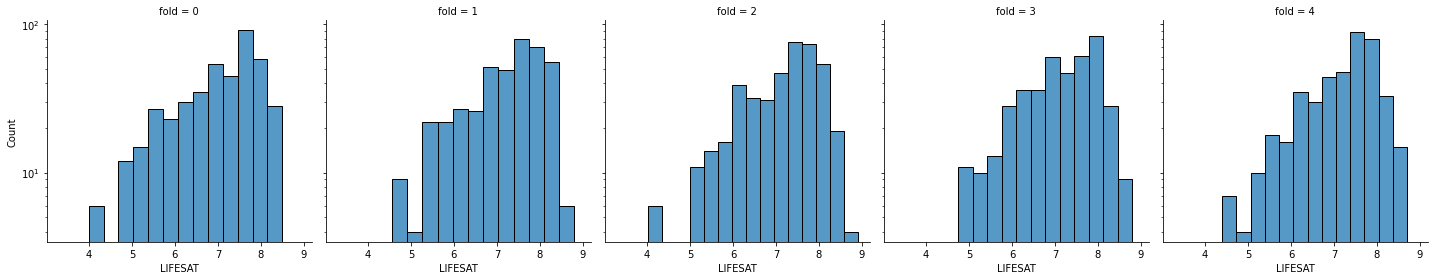

In [ ]:
g = sns.FacetGrid(df_happiness, col='fold', height=4)
g.map_dataframe(sns.histplot, x='LIFESAT')
g.set(yscale ='log')
g.add_legend()
plt.savefig(os.path.join(data_dir, 'LifeSatDistribution_Splits.png'))

## Starter-Kit

In [ ]:
categorical_columns = [col for col in df_happiness.columns[:-1] if df_happiness[col].nunique() < 40]
categorical_columns

['isced11', 'sex', 'age', 'geo', 'time']

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Ordinal Encoding for features with text
ct = ColumnTransformer([("ordinal_encoder", OrdinalEncoder(), ['isced11', 'sex', 'age', 'geo', 'time'])],
                        remainder='passthrough')

X = pd.DataFrame(ct.fit_transform(df_happiness),
                 columns=df_happiness.columns)
  
rmses = []
for fold in range(n_splits):
  X_train = X[X['fold']!=fold].copy()
  X_test = X[X['fold']==fold].copy()

  y_train = X_train.pop('LIFESAT')
  y_test = X_test.pop('LIFESAT')

  X_train = X_train.drop('fold', axis=1)
  X_test = X_test.drop('fold', axis=1)

  # Fill missing values
  X_train.fillna(0, inplace=True)
  X_test.fillna(0, inplace=True)

  # train model
  model = DecisionTreeRegressor(max_depth=10)
  model.fit(X_train, y_train)
  
  # make predictions
  predictions = model.predict(X_test)
  rmses.append(mean_squared_error(predictions, y_test, squared=False))

print(f"RMSE: {np.mean(rmses):.4f} ({np.std(rmses):.4f})")

RMSE: 0.3697 (0.0156)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


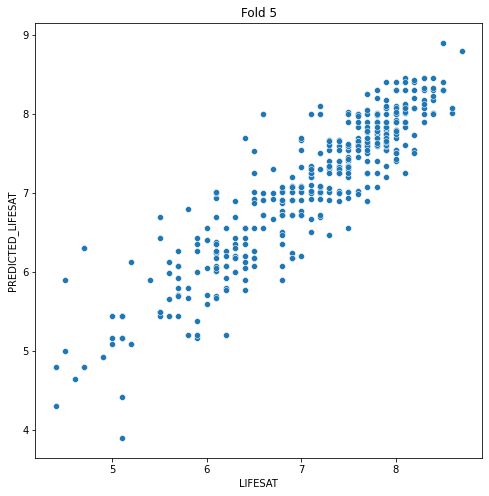

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(y_test, model.predict(X_test))
plt.title('Fold 5')
plt.xlabel('LIFESAT')
plt.ylabel('PREDICTED_LIFESAT')
plt.show()